In [26]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [35]:
df = pd.read_csv("ml_data.csv")
df = df.sort_values(by='time_of_day')    
df= df.drop(columns=["Unnamed: 0","time_of_day"])
df.head()


,available_bike_stands,bike_stands,available_bikes,temperature,wind_speed,month,day,hour,category_broken clouds,category_clear sky,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,0,30,30,7,9.77,2,25,15,True,False,...,False,False,False,False,False,False,False,False,False,False
1,34,40,6,8,9.77,2,25,15,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,30,30,8,9.77,2,25,15,True,False,...,False,False,False,False,False,False,False,False,False,False
3,6,30,24,7,9.77,2,25,15,True,False,...,False,False,False,False,False,False,False,False,False,False
4,23,23,0,7,9.77,2,25,15,True,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
train_set, test_set= np.split(df, [int(.7 *len(df))])
X_train = train_set.drop(columns=['available_bikes',"available_bike_stands"])
y_train = train_set['available_bikes']  
X_test = test_set.drop(columns=['available_bikes',"available_bike_stands"])
y_test = test_set['available_bikes'] 

c:\Users\carlo\anaconda3\envs\Pytorch\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [37]:
X_train

,bike_stands,temperature,wind_speed,month,day,hour,category_broken clouds,category_clear sky,category_few clouds,category_fog,...,category_108,category_109,category_110,category_111,category_112,category_113,category_114,category_115,category_116,category_117
0,30,7,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,40,8,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30,8,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,7,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,23,7,9.77,2,25,15,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343128,30,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343129,38,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343130,27,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
343131,40,10,4.63,3,13,16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
model = LinearRegression()
reg_model = model.fit(X_train, y_train)
result = reg_model.predict(X_test)

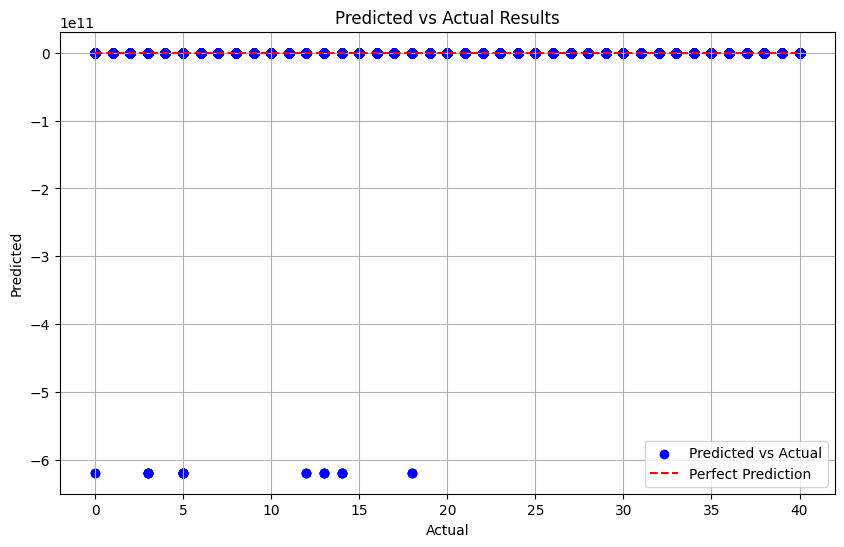

Mean Absolute Error (MAE): 130464104.28349952
Mean Squared Error (MSE): 8.074321445294852e+19
Root Mean Squared Error (RMSE): 8985722811.936083
R-squared (R²): -8.455157673932169e+17


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test contains the actual target values and result contains the predicted values
# Replace y_test and result with your actual variables

# Plot predicted vs. actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, result, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, result)
mse = mean_squared_error(y_test, result)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, result)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
